In [1]:
import jax
import jax.numpy as jnp

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from training import Agent
from loss import params, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn

import config
config.n_data = {
    "i": 100,
    "b": 100,
    "cx": 501,
    "ct": 201,
    "dx": 100,
    "dt": 600,
}
config.batch_size = {
    "dirichlet": (config.n_data["i"]+2*config.n_data["b"]+config.n_data["dx"]*config.n_data["dt"]) // 10,
    "collocation": (config.n_data["dx"]*config.n_data["dt"]+config.n_data["cx"]*config.n_data["ct"]) // 10,
}
config.iterations = 10000
config.print_every = 100
config.lr = 1e-3
config.weights = {
	"c1": 1.0,
	"c2": 10.0,
	"d1": 10.0,
	"d2": 10.0,
	"l1": 1e-8,
	"l2": 1e-8,
    "s": 1e-8
}

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/15, 11:24:58, Iteration: 100, Train Loss: 5.2976e+00, c1: 2.3155e-01, c2: 1.6773e-03, d1: 5.0493e-01, d2: 0.0000e+00, s: 4.8072e-02, l1_reg: 3.2540e+02, l2_reg: 5.1365e+01
2020/09/15, 11:24:59, Iteration: 200, Train Loss: 2.2072e+00, c1: 5.4056e-01, c2: 2.3267e-03, d1: 1.6434e-01, d2: 0.0000e+00, s: 2.1244e-02, l1_reg: 3.2962e+02, l2_reg: 5.3059e+01
2020/09/15, 11:25:00, Iteration: 300, Train Loss: 2.0222e+00, c1: 3.3661e-01, c2: 4.4059e-03, d1: 1.6415e-01, d2: 0.0000e+00, s: 8.4310e-03, l1_reg: 3.2918e+02, l2_reg: 5.2826e+01
2020/09/15, 11:25:01, Iteration: 400, Train Loss: 1.9341e+00, c1: 2.8967e-01, c2: 6.2358e-04, d1: 1.6382e-01, d2: 0.0000e+00, s: 6.9505e-03, l1_reg: 3.2894e+02, l2_reg: 5.2777e+01
2020/09/15, 11:25:02, Iteration: 500, Train Loss: 1.9640e+00, c1: 2.9080e-01, c2: 3.9281e-03, d1: 1.6339e-01, d2: 0.0000e+00, s: 5.9406e-03, l1_reg: 3.2885e+02, l2_reg: 5.2781e+01
2020/09/15, 11:25:02, Iteration: 600, Train Loss: 1.8211e+00, c1: 1.6843e-01, c2: 2.3830e-03, d1: 1.

2020/09/15, 11:25:36, Iteration: 4700, Train Loss: 1.9377e-01, c1: 3.6629e-02, c2: 2.8166e-03, d1: 1.2897e-02, d2: 0.0000e+00, s: 6.7103e-03, l1_reg: 3.3505e+02, l2_reg: 6.6934e+01
2020/09/15, 11:25:37, Iteration: 4800, Train Loss: 2.4371e-01, c1: 8.5448e-02, c2: 2.0999e-03, d1: 1.3726e-02, d2: 0.0000e+00, s: 6.7094e-03, l1_reg: 3.3488e+02, l2_reg: 6.6908e+01
2020/09/15, 11:25:37, Iteration: 4900, Train Loss: 2.0002e-01, c1: 4.1272e-02, c2: 1.9829e-03, d1: 1.3892e-02, d2: 0.0000e+00, s: 6.0308e-03, l1_reg: 3.3480e+02, l2_reg: 6.6933e+01
2020/09/15, 11:25:38, Iteration: 5000, Train Loss: 2.0104e-01, c1: 4.1047e-02, c2: 2.2355e-03, d1: 1.3763e-02, d2: 0.0000e+00, s: 5.3966e-03, l1_reg: 3.3463e+02, l2_reg: 6.6924e+01
2020/09/15, 11:25:39, Iteration: 5100, Train Loss: 1.8783e-01, c1: 3.6393e-02, c2: 1.9223e-03, d1: 1.3221e-02, d2: 0.0000e+00, s: 5.1181e-03, l1_reg: 3.3450e+02, l2_reg: 6.6888e+01
2020/09/15, 11:25:40, Iteration: 5200, Train Loss: 2.0733e-01, c1: 3.9892e-02, c2: 2.8016e-03, 

2020/09/15, 11:26:13, Iteration: 9300, Train Loss: 1.5355e-01, c1: 6.0989e-03, c2: 1.2654e-03, d1: 1.3479e-02, d2: 0.0000e+00, s: 3.7145e-03, l1_reg: 3.2883e+02, l2_reg: 6.6295e+01
2020/09/15, 11:26:14, Iteration: 9400, Train Loss: 1.5363e-01, c1: 9.7342e-03, c2: 1.9068e-03, d1: 1.2483e-02, d2: 0.0000e+00, s: 3.0894e-03, l1_reg: 3.2874e+02, l2_reg: 6.6371e+01
2020/09/15, 11:26:15, Iteration: 9500, Train Loss: 2.2177e-01, c1: 2.4418e-02, c2: 3.1534e-03, d1: 1.6581e-02, d2: 0.0000e+00, s: 2.0828e-03, l1_reg: 3.2845e+02, l2_reg: 6.6313e+01
2020/09/15, 11:26:16, Iteration: 9600, Train Loss: 1.5633e-01, c1: 6.2743e-03, c2: 1.8273e-03, d1: 1.3178e-02, d2: 0.0000e+00, s: 3.8755e-03, l1_reg: 3.2830e+02, l2_reg: 6.6279e+01
2020/09/15, 11:26:16, Iteration: 9700, Train Loss: 2.0851e-01, c1: 1.8120e-02, c2: 2.5131e-03, d1: 1.6525e-02, d2: 0.0000e+00, s: 2.1285e-03, l1_reg: 3.2820e+02, l2_reg: 6.6305e+01
2020/09/15, 11:26:17, Iteration: 9800, Train Loss: 1.6418e-01, c1: 1.4915e-02, c2: 1.2567e-03, 

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [2]:
config.iterations = 100000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/15, 11:26:27, Iteration: 11000, Train Loss: 1.5337e-01, c1: 1.0342e-02, c2: 1.6116e-03, d1: 1.2691e-02, d2: 0.0000e+00, s: 2.3720e-03, l1_reg: 3.2632e+02, l2_reg: 6.5880e+01
2020/09/15, 11:26:35, Iteration: 12000, Train Loss: 1.6849e-01, c1: 1.9783e-02, c2: 1.1468e-03, d1: 1.3724e-02, d2: 0.0000e+00, s: 1.5530e-03, l1_reg: 3.2496e+02, l2_reg: 6.5404e+01
2020/09/15, 11:26:43, Iteration: 13000, Train Loss: 1.6386e-01, c1: 2.4198e-02, c2: 1.2063e-03, d1: 1.2760e-02, d2: 0.0000e+00, s: 1.9544e-03, l1_reg: 3.2365e+02, l2_reg: 6.4986e+01
2020/09/15, 11:26:51, Iteration: 14000, Train Loss: 1.7604e-01, c1: 7.8530e-03, c2: 1.1897e-03, d1: 1.5628e-02, d2: 0.0000e+00, s: 1.9382e-03, l1_reg: 3.2253e+02, l2_reg: 6.4770e+01
2020/09/15, 11:26:59, Iteration: 15000, Train Loss: 1.5693e-01, c1: 9.9926e-03, c2: 5.3674e-04, d1: 1.4157e-02, d2: 0.0000e+00, s: 1.3050e-03, l1_reg: 3.2111e+02, l2_reg: 6.4272e+01
2020/09/15, 11:27:08, Iteration: 16000, Train Loss: 1.6133e-01, c1: 1.7789e-02, c2: 1.2156

2020/09/15, 11:32:41, Iteration: 57000, Train Loss: 1.3122e-01, c1: 2.2719e-03, c2: 5.8701e-04, d1: 1.2307e-02, d2: 0.0000e+00, s: 2.2832e-10, l1_reg: 2.1629e+02, l2_reg: 5.6823e+01
2020/09/15, 11:32:49, Iteration: 58000, Train Loss: 1.3348e-01, c1: 6.0530e-03, c2: 5.8408e-04, d1: 1.2158e-02, d2: 0.0000e+00, s: 2.2695e-11, l1_reg: 2.1350e+02, l2_reg: 5.7038e+01
2020/09/15, 11:32:57, Iteration: 59000, Train Loss: 1.3544e-01, c1: 2.6818e-03, c2: 3.4559e-04, d1: 1.2930e-02, d2: 0.0000e+00, s: 2.8697e-10, l1_reg: 2.1152e+02, l2_reg: 5.6835e+01
2020/09/15, 11:33:05, Iteration: 60000, Train Loss: 1.3593e-01, c1: 7.3576e-03, c2: 3.0573e-04, d1: 1.2552e-02, d2: 0.0000e+00, s: 6.4612e-09, l1_reg: 2.0951e+02, l2_reg: 5.6931e+01
2020/09/15, 11:33:13, Iteration: 61000, Train Loss: 1.4128e-01, c1: 4.8041e-03, c2: 1.0007e-03, d1: 1.2646e-02, d2: 0.0000e+00, s: 2.0829e-12, l1_reg: 2.0944e+02, l2_reg: 5.7190e+01
2020/09/15, 11:33:21, Iteration: 62000, Train Loss: 1.3342e-01, c1: 6.0840e-03, c2: 4.6244

2020/09/15, 11:38:53, Iteration: 103000, Train Loss: 1.3604e-01, c1: 5.4116e-03, c2: 4.6019e-04, d1: 1.2603e-02, d2: 0.0000e+00, s: 2.1009e-12, l1_reg: 1.8086e+02, l2_reg: 6.7634e+01
2020/09/15, 11:39:02, Iteration: 104000, Train Loss: 1.2397e-01, c1: 7.4872e-04, c2: 2.5174e-04, d1: 1.2070e-02, d2: 0.0000e+00, s: 1.0000e-12, l1_reg: 1.8081e+02, l2_reg: 6.8090e+01
2020/09/15, 11:39:10, Iteration: 105000, Train Loss: 1.2645e-01, c1: 2.6267e-03, c2: 2.3623e-04, d1: 1.2146e-02, d2: 0.0000e+00, s: 4.6665e-10, l1_reg: 1.7830e+02, l2_reg: 6.8373e+01
2020/09/15, 11:39:18, Iteration: 106000, Train Loss: 1.3556e-01, c1: 6.8455e-03, c2: 4.3208e-04, d1: 1.2439e-02, d2: 0.0000e+00, s: 1.4989e-11, l1_reg: 1.7920e+02, l2_reg: 6.9034e+01
2020/09/15, 11:39:26, Iteration: 107000, Train Loss: 1.3041e-01, c1: 2.3955e-03, c2: 2.9929e-04, d1: 1.2502e-02, d2: 0.0000e+00, s: 2.6859e-10, l1_reg: 1.7740e+02, l2_reg: 6.9291e+01
2020/09/15, 11:39:34, Iteration: 108000, Train Loss: 1.3645e-01, c1: 5.1485e-03, c2: 

<IPython.core.display.Javascript object>


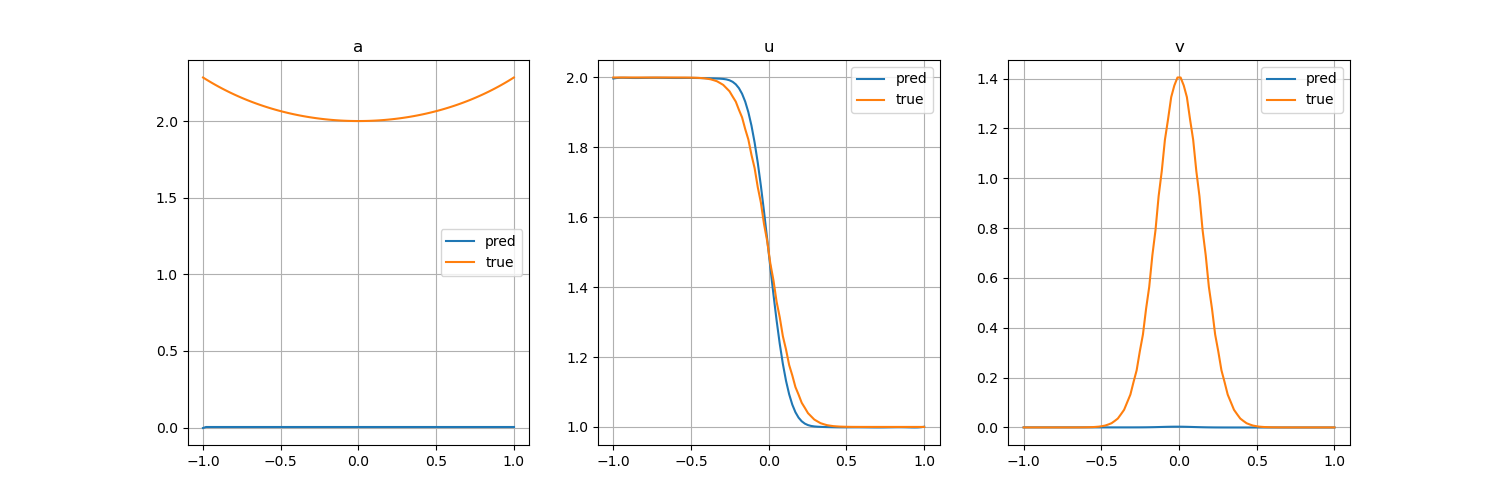

In [4]:
from loss import inverse_model, direct_model
from data import domain
import jax.numpy as jnp
import numpy as np

inverse_params = agent.params[1]
x_test = jnp.linspace(*domain[:, 0], 100).reshape((-1, 1))
a_fn = lambda x: 1+np.exp(1/4*x**2)
a_pred = inverse_model(inverse_params, x_test)
a_true = a_fn(x_test)

direct_params = agent.params[0]
t_test = domain[1, 1]*jnp.ones_like(x_test)
uv_pred = direct_model(direct_params, jnp.hstack([x_test, t_test]))

from scipy.io import loadmat
data_true = loadmat("problem2_4_snapshot_epsilon_1e-12.mat")
u_true, v_true = data_true["u_snapshots"][:, -1], data_true["v_snapshots"][:, -1]

import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x_test, a_pred, label = "pred")
ax[0].plot(x_test, a_true, label = "true")
ax[0].set_title("a")
ax[1].plot(x_test, uv_pred[:, 0:1], label = "pred")
ax[1].plot(x_test, u_true, label = "true")
ax[1].set_title("u")
ax[2].plot(x_test, uv_pred[:, 1:2], label = "pred")
ax[2].plot(x_test, v_true, label = "true")
ax[2].set_title("v")
for ax_ in ax:
	ax_.legend()
	ax_.grid()
plt.show()